# The perceptron -  Recognising the MNIST digits

<div>Table of contents</div>
<div id="toc"></div>

In [12]:
%matplotlib inline
from pylab import *
from utils import *

Let us implement a perceptron that categorize the MNIST images as numbers.
### Training
#### Initializing data and parameters
First we initialize the dataset (see [The MNIST dataset](http://francesco-mannella.github.io/neunet-basics/mnist.html)), the we define few parameters and initialize the main variables:

In [13]:
#-----------------------------------------------------------
# training

# Set the number of patterns 
n_patterns = 600

# Take 'n_patterns' rows
indices = arange(training_length)
shuffle(indices)
indices = indices[:n_patterns]

# Get patterns
patterns = array(mndata.train_images)[indices]

# Rescale all patterns between 0 and 1
patterns = sign(patterns/255.0)

# Get the labels of the patterns
labels = array(mndata.train_labels)[indices]

# Constants

# Number of repetitions of 
# the pattern series
epochs = 60

# Number of trials for learning
stime = epochs*n_patterns

# Create a list of pattern indices.
# We will reshuffle it at each 
# repetition of the series
pattern_indices = arange(n_patterns)

# Learning rate
eta = 0.00001

# Number of output unit 
# (remember that the input is given
# by a 28*28 vector)
m = 10

# Variables 

# Init weights
w = zeros([m, n+1])

# Init input units
x = zeros(n)

# init net input
net = zeros(m)

# Init output units
y = zeros(m)

# Init desired output vector
y_target = zeros(m)

# We will store the input, output and error history
input_store = zeros([n,stime])
output_store = zeros([m,stime])
label_store = zeros([m,stime])
squared_errors = zeros(epochs)

Let us visualize the first 20 patterns of the trining set:

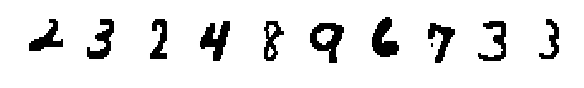

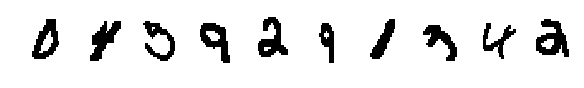

In [14]:
for i in xrange(20):
    # Create a new figure after each 10-th item
    if i%10 == 0:
        fig = figure(figsize = (20, 1))
    
    # Plot current item (we use the 
    # function plot_img in our utils.py)
    plot_img( to_mat(patterns[i]), 
        fig, (i%10)+1, windows = 20 )
    
    # show figure after all 1o items
    # are plotted
    if i%10 == 9:
        show()

#### Spreading of the network during training
Here starts the core part, iterating the timesteps. We also divide the training phase in epochs. Each epoch is a single presentation of the whole input pattern series. The sum of squared errors will be grouped by epochs.

In [15]:
# counter of repetitions 
# of the series of patterns
epoch = -1


# Iterate trials
for t in xrange(stime) :
    
    # Reiterate the input pattern 
    # sequence through timesteps
    
    # Reshuffle at the end 
    # of the series
    if t%n_patterns == 0:
        shuffle(pattern_indices)
        epoch += 1
    
    # Current pattern 
    k = pattern_indices[t%n_patterns]
    
    # Aggregate inputs and the bias unit
    x = hstack([ 1, patterns[k] ])
    
    # Only the unit representing the desired 
    # category is set to 1
    y_target *= 0
    y_target[labels[k]] = 1
    
    # !!!! The dot product becomes a matrix 
    # product with more than one output unit !!!!
    net = dot(w,x) 
    
    # output function
    y = step(net)
    
    # Learning - outer product
    w += eta*outer(y_target - y, x);
    
    # Store data
    input_store[:,t] = x[1:]
    output_store[:,t] = y
    label_store[:,t] = y_target
    
    squared_errors[epoch] += 0.5*sum((y_target - y)**2)

#### Plotting the results of training
We plot the history of the squared errors through epocs and a visualization of the weights to each ouput unit.

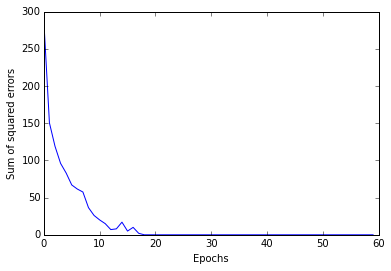

In [16]:
fig = figure()
ax = fig.add_subplot(111)
ax.plot(squared_errors)
xlabel("Epochs")
ylabel("Sum of squared errors")

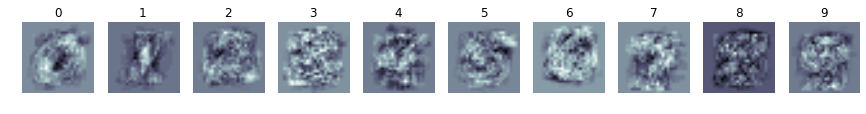

In [17]:
figure(figsize=(15,2))
for i in xrange(m) : 
    subplot(1,m,i+1)
    title(i)
    im = to_mat(w[i,1:]) 
    imshow(im, cmap=cm.bone)
    axis('off')

show()

### Testing
#### Initializing data and parameters
Now we create a new dataset to test the network and reset some variables: 

In [18]:
#-----------------------------------------------------------
# test

# Set the number of patterns 
n_patterns = 40

# Take 'n_patterns' rows
indices = arange(test_length)
shuffle(indices)
indices = indices[:n_patterns]

# Get patterns
patterns = array(mndata.test_images)[indices]

# Rescale all patterns between 0 and 1
patterns = sign(patterns/255.0)

# Get the labels of the patterns
labels = array(mndata.test_labels)[indices]

# Constants

# Number of trials for learning
stime = n_patterns

# Create a list of pattern indices.
# We will reshuffle it at each 
# repetition of the series
pattern_indices = arange(n_patterns)
shuffle(pattern_indices)

# Clear variables 

x *= 0
net *= 0
y *= 0

# We will store the input, output and error history
input_store = zeros([patterns.shape[1], stime])
output_store = zeros([m, stime])
target_store = zeros([m, stime])



#### Spreading of the network during test
We only do spreading in each timestep

In [19]:
# Iterate trials
for t in xrange(stime) :
        
    # Aggregate inputs and the bias unit
    x = hstack([ 1, patterns[t] ])
    
    # Only the unit representing the desired 
    # category is set to 1
    y_target *= 0
    y_target[labels[t]] = 1
    
    # !!!! The dot product becomes a matrix 
    # product with more than one output unit !!!!
    net = dot(w,x) 
    
    # output function
    y = step(net)
    
    i# store
    input_store[:,t] = x[1:]
    output_store[:,t] = y
    target_store[:,t] = y_target


#### Testing using the MNIST test dataset
Finally we test the network on new items taken from the test dataset:

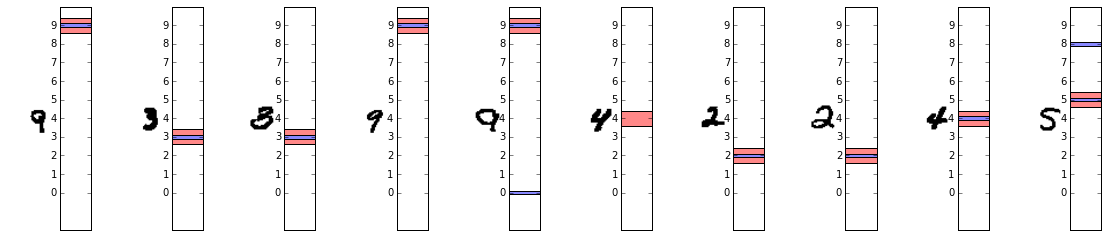

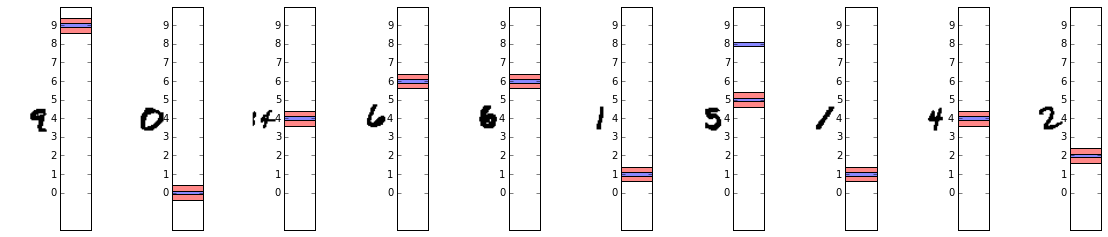

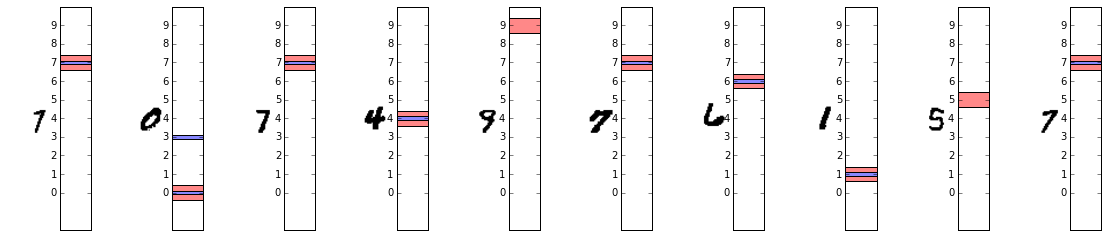

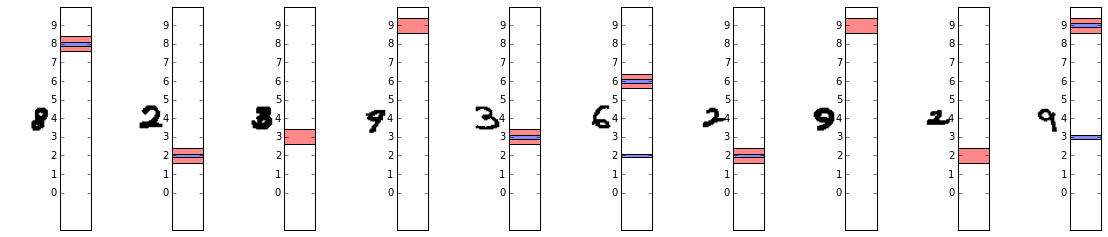

In [20]:
for t in xrange(stime) :
    im = to_mat(input_store[:,t]) 
    
    if t%10 == 0:
        fig = figure("test", figsize=(20,4))
    
    ax1 = fig.add_subplot(1,30,3*(t%10)+2)
    ax1.imshow(im, cmap=cm.binary)
    ax1.set_axis_off()

    ax2 = fig.add_subplot(1,30,3*(t%10)+3)
    ax2.barh(arange(m), target_store[:,t], align='center', 
             color='#ff8888', zorder=1)
    ax2.barh(arange(m), output_store[:,t], align='center', 
             height = 0.2, color='#8888ff', zorder=2)
    ax2.set_yticks(arange(10))
    ax2.set_yticklabels(arange(10))    
    ax2.set_xticks([])    
    
    if t%10 == 9:
        show()


<br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br><br><br><br><br><br><br>
The next cell is just for styling

In [21]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../style/ipybn.css", "r").read()
    return HTML(styles)
css_styling()